In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import ma

from metpy.cbook import get_test_data
from metpy.io.nexrad import Level3File
from metpy.plots import ctables

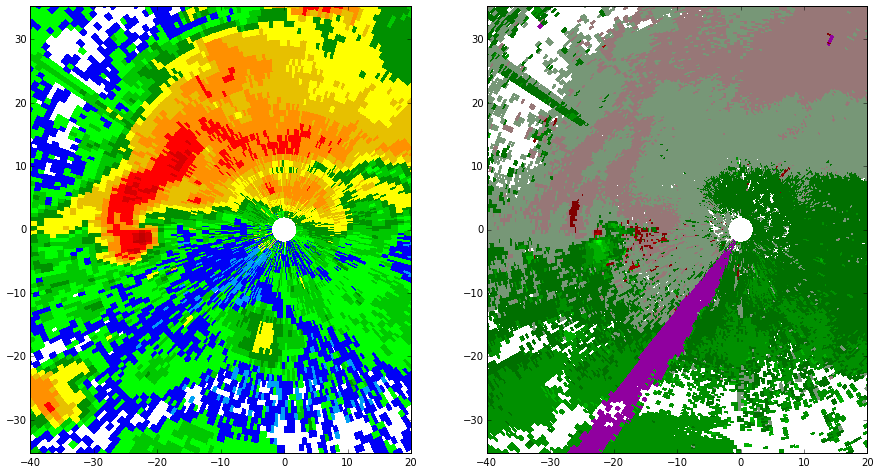

In [2]:
fig, axes = plt.subplots(1, 2, figsize=(15, 8))
for v, ctable, ax in zip(('N0Q', 'N0U'), ('NWSReflectivity', 'NWSVelocity'), axes):
    # Open the file
    name = get_test_data('nids/KOUN_SDUS54_%sTLX_201305202016' % v, as_file_obj=False)
    f = Level3File(name)

    # Pull the data out of the file object
    datadict = f.sym_block[0][0]

    # Turn into an array, then mask
    data = ma.array(datadict['data'])
    data[data==0] = ma.masked

    # Grab azimuths and calculate a range based on number of gates
    az = np.array(datadict['start_az'] + [datadict['end_az'][-1]])
    rng = np.linspace(0, f.max_range, data.shape[-1] + 1)

    # Convert az,range to x,y
    xlocs = rng * np.sin(np.deg2rad(az[:, np.newaxis]))
    ylocs = rng * np.cos(np.deg2rad(az[:, np.newaxis]))
   
    # Plot the data
    norm, cmap = ctables.registry.get_with_steps(ctable, 16, 16)
    ax.pcolormesh(xlocs, ylocs, data, norm=norm, cmap=cmap)
    ax.set_aspect('equal', 'datalim')
    ax.set_xlim(-40, 20)
    ax.set_ylim(-30, 30)

plt.show()